In [1]:
!pip install --quiet git+https://github.com/greentfrapp/lucent.git

     |████████████████████████████████| 204kB 12.5MB/s 
ERROR: kornia 0.4.0 has requirement torch<1.7.0,>=1.6.0, but you'll have torch 1.7.0+cu101 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.


In [2]:
!git clone https://github.com/nathanhubens/MultimedIA.git

Cloning into 'MultimedIA'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 88 (delta 20), reused 24 (delta 10), pack-reused 52
Unpacking objects: 100% (88/88), done.


In [3]:
cd MultimedIA/Lesson\ 4

/content/MultimedIA/Lesson 4


In [4]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import torch

from google.colab import files

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo import inceptionv1
from lucent.misc.io import show
from feature_inversion import *

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = inceptionv1(pretrained=True)
_ = model.to(device).eval()

Downloading: "https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth" to /root/.cache/torch/hub/checkpoints/inception5h.pth


## Run an Example!

Here we reproduce the Lucid example for all layers in InceptionV1.

In [6]:
img = load("https://upload.wikimedia.org/wikipedia/en/6/6e/Pink_Floyd_-_Division_Bell.jpg")

In [7]:
layers = ['conv2d%d' % i for i in range(1, 3)] + \
         ['mixed3a', 'mixed3b', 'mixed4a',
          'mixed4b', 'mixed4c', 'mixed4d',
          'mixed4e', 'mixed5a', 'mixed5b']

conv2d1


/usr/local/lib/python3.6/dist-packages/lucent/optvis/param/spatial.py:57: UserWarning: The function torch.irfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.irfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:602.)
  image = torch.irfft(scaled_spectrum_t, 2, normalized=True, signal_sizes=(h, w))



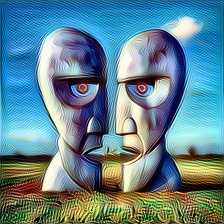

conv2d2



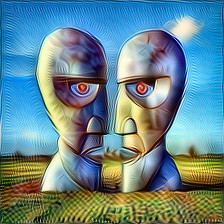

mixed3a



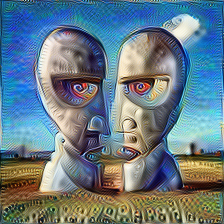

mixed3b



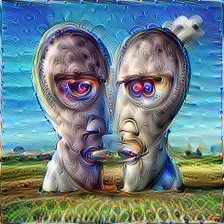

mixed4a



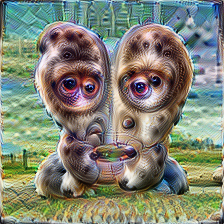

mixed4b



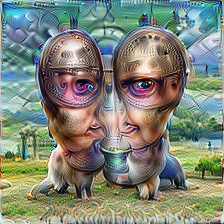

mixed4c



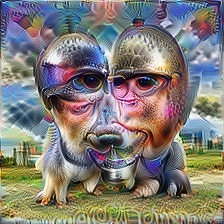

mixed4d



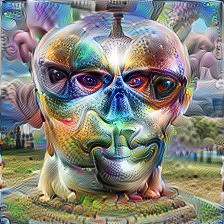

mixed4e



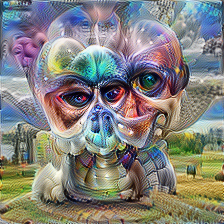

mixed5a



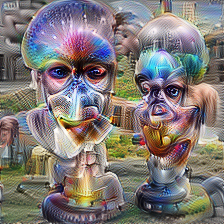

mixed5b



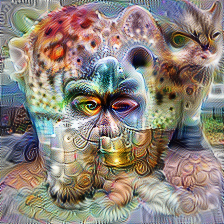

In [8]:
for layer in layers:
  print(layer)
  feature_inversion(img, model, layer, device=device)

## Varying Cossine Similarity

We can use the `cossim_pow` parameter to force a result closer to the initial image

0.0



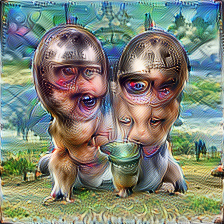

0.5



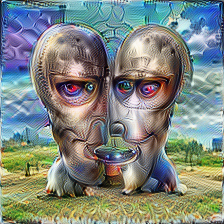

1.0



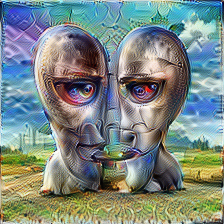

2.0



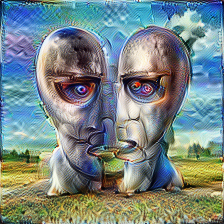

In [9]:
for cossim in [0.0, 0.5, 1.0, 2.0]:
  print(cossim)
  feature_inversion(img, model, layer='mixed4b', cossim_pow=cossim, device=device)

## Try yourselves!

You can also import an image directly in Colab ! 

In [11]:
img = Image.open('test.png')

In [12]:
size=224, 224
img = img.resize(size, Image.ANTIALIAS)
img = np.array(img, dtype='float32')[:,:,:3] / 255


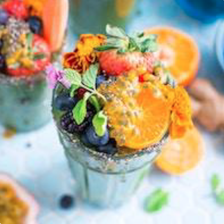

In [13]:
show(img)


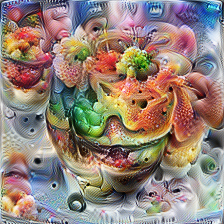

In [ ]:
feature_inversion(img, model, layer='mixed4d', device=device)